In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pickle
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

In [2]:
infile = open('../river_sources.pkl', 'rb')
river_sources = pickle.load(infile)

In [3]:
particles = xr.load_dataset('../data/forward_2years.nc')
particles

<xarray.Dataset>
Dimensions:     (obs: 1321, traj: 1000000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 1e+06 1e+06 1e+06 ... 2e+06 2e+06 2e+06
    time        (traj, obs) datetime64[ns] 2018-01-01T12:00:00 ... 2019-10-23...
    lat         (traj, obs) float32 -9.292102 -9.235152 ... -35.696754 -35.66999
    lon         (traj, obs) float32 13.002034 12.962987 ... -29.274343
    z           (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.1.dev292+gc6c2d7bb
    parcels_mesh:           spherical

In [4]:
parcels_origin = {'Luanda': (-9.3, 13.),
                 'Cuvo': (-10.87917, 13.7),
                 'Paraíba do Sul': (-21.6208, -40.9),
                 'Itajaí-Açu': (-26.9125, -48.5),
                 'Chiloango-Congo': (-5.6442, 12.05),
                 'Cape-Town': (-33.93, 18.2),
                 'Rio-de-la-Plata': (-34.3, -58.2),
                 'Rio-de-Janeiro': (-23.1, -43.32083),
                 'Porto-Alegre': (-32.15, -51.9),
                 'Santos': (-24.05, -46.2958)}

In [5]:
labels= ['Luanda', 
         'Cuvo', 
         'Paraíba do Sul', 
         'Itajaí-Açu', 
         'Chiloango-Congo', 
         'Cape-Town', 
         'Rio-de-la-Plata', 
         'Rio-de-Janeiro', 
         'Porto-Alegre', 
         'Santos']

In [6]:
for j,i in enumerate(range(0, 1000000, 100000)):
    print(i, i+1000000, particles['lat'][i,0].values, particles['lon'][i,0].values)

0 1000000 -9.292102 13.002034
100000 1100000 -10.863335 13.701469
200000 1200000 -21.609884 -40.91176
300000 1300000 -26.90564 -48.488934
400000 1400000 -5.660698 12.029167
500000 1500000 -33.9215 18.199514
600000 1600000 -34.295685 -58.208424
700000 1700000 -23.097609 -43.315678
800000 1800000 -32.143936 -51.90631
900000 1900000 -24.055046 -46.284233


In [7]:
london_tube = ['#B36305', 
                '#E32017',
                '#FFD300',
                '#00782A',
                '#00A4A7',
                '#F3A9BB',
                #'#A0A5A9',
                '#9B0056',
                #'#000000',
                '#EE7C0E',
                '#003688',
                '#84B817',
                '#0098D4',
                '#95CDBA']

In [8]:
time_range = pd.date_range('2018-01-01T12:00:00', '2019-10-23T12:00:00', freq='12H')

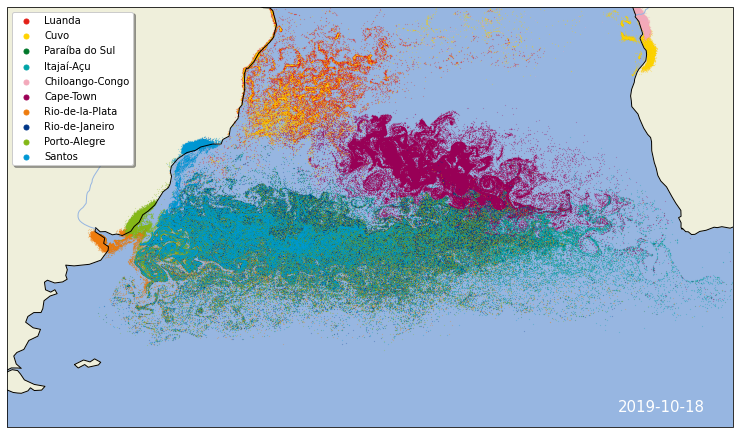

In [9]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

t = 1310
ax.text(10,-58,time_range[t].date(), color='white', fontsize=15)
for j,n in enumerate(range(0, 1000000, 100000)):
    #print(i, i+1000000, particles['lat'][i,0].values, particles['lon'][i,0].values)
    m = n+100000
    ax.scatter(particles['lon'][n:m,t], particles['lat'][n:m,t], color=london_tube[j+1], s=0.01, label=labels[j]);
    
plt.legend(markerscale=50, shadow=True);



!mkdir tmp

k = 1
for t in range(0,1321, 5):
    fig = plt.figure(figsize=(13,13))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.RIVERS)
    ax.text(10,-58, time_range[t].date(), color='white', fontsize=15)
    for j,n in enumerate(range(0, 1000000, 100000)):
        m = n+100000
        ax.scatter(particles['lon'][n:m,t], particles['lat'][n:m,t], color=london_tube[j+1], s=0.01, label=labels[j]);

    plt.legend(markerscale=50, shadow=True);
    plt.savefig(f'tmp/frame_{k:03d}', dpi=100)
    k +=1
    plt.close()
    
!convert -delay 5 -loop 0 tmp/*.png anim.gif
!rm -rf tmp

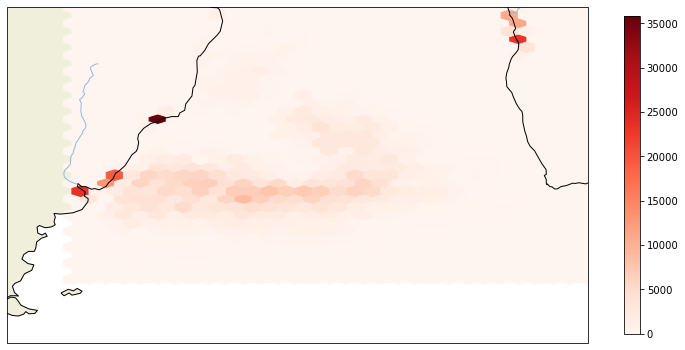

In [10]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

t = 1320
n = 100000

ax.text(10,-58,time_range[t].date(), color='white', fontsize=15)

    
m = n+100000
#ax.scatter(particles['lon'][n:m,t], particles['lat'][n:m,t], color=london_tube[j+1], s=0.01, label=labels[j]);


hb = ax.hexbin(particles['lon'][:,t], particles['lat'][:,t], vmin=0, gridsize=30, cmap='Reds')
cb = fig.colorbar(hb, ax=ax, shrink=0.45)

In [11]:
particles['lon'][:,t]

<xarray.DataArray 'lon' (traj: 1000000)>
array([       nan,        nan,        nan, ..., -45.942955, -37.90592 ,
       -29.274343], dtype=float32)
Dimensions without coordinates: traj
Attributes:
    long_name:      
    standard_name:  longitude
    units:          degrees_east
    axis:           X

# mask

In [15]:
model = xr.open_dataset('../data/mercatorpsy4v3r1_gl12_mean_20180101_R20180110.nc')
indices = {'lat': slice(1, 900), 'lon': slice(1284, 2460)}

In [24]:
u = model['uo'][0,0,indices['lat'], indices['lon']]

In [57]:
lat_1 = model['latitude'][indices['lat']].values[0]
lat_2 = model['latitude'][indices['lat']].values[-1]
lon_1 = model['longitude'][indices['lon']].values[0]
lon_2 = model['longitude'][indices['lon']].values[-1]

for i in itertools.product([lat_1, lat_2], [lon_1, lon_2]):
    print(i)

In [61]:
import itertools

In [63]:
for i in itertools.product([lat_1, lat_2], [lon_1, lon_2]):
    print(i)

(-79.916664, -73.0)
(-79.916664, 24.916666)
(-5.0833335, -73.0)
(-5.0833335, 24.916666)


In [60]:
lon_2

24.916666

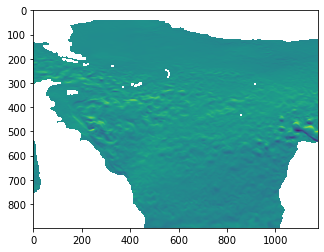

In [25]:
plt.imshow(u)

In [26]:
unos = np.ones_like(u)

In [97]:
mask = np.isnan(u)

In [98]:
unos_mask = np.ma.masked_array(unos, mask=mask)

In [64]:
unos.shape

(899, 1176)

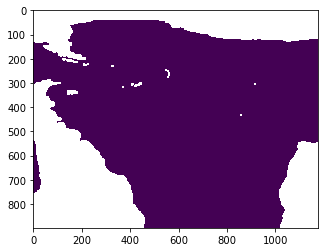

In [33]:
plt.imshow(unos_mask)

# masked

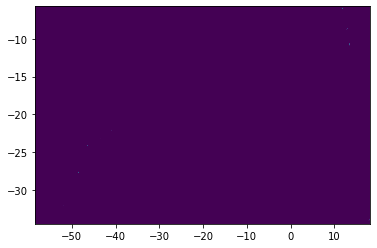

In [72]:
t = 9
h = plt.hist2d(particles['lon'][:,t].values, particles['lat'][:,t].values, bins=(899, 1176));

In [118]:
t = 1300
lons = particles['lon'][:,t].values
index = np.where(np.isnan(lons) == False)
lons = lons[index]
lats = particles['lat'][:,t].values
index = np.where(np.isnan(lats) == False)
lats = lats[index]

lat_1 = model['latitude'][indices['lat']].values[0]
lat_2 = model['latitude'][indices['lat']].values[-1]
lon_1 = model['longitude'][indices['lon']].values[0]
lon_2 = model['longitude'][indices['lon']].values[-1]

for coord_tuple in itertools.product([lat_1, lat_2], [lon_1, lon_2]):
    lats = np.hstack((lats,coord_tuple[0]))
    lons = np.hstack((lons,coord_tuple[1]))

In [123]:
h, la, lo = np.histogram2d(lons, lats, bins=(899, 1176))

In [128]:
h_mask = np.ma.masked_array(h, mask=mask)

In [ ]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-70, 25, -60, -5), crs=ccrs.PlateCarree())
# ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

t = 1320
n = 100000

ax.text(10,-58,time_range[t].date(), color='white', fontsize=15)

    
m = n+100000
#ax.scatter(particles['lon'][n:m,t], particles['lat'][n:m,t], color=london_tube[j+1], s=0.01, label=labels[j]);


hb = ax.hexbin(particles['lon'][:,t], particles['lat'][:,t], vmin=0, gridsize=30, cmap='Reds')
cb = fig.colorbar(hb, ax=ax, shrink=0.45)

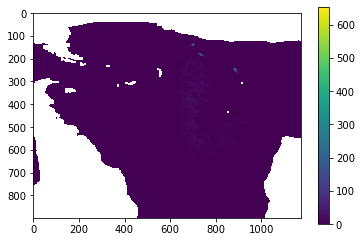

In [131]:
plt.imshow(h_mask)
plt.colorbar()

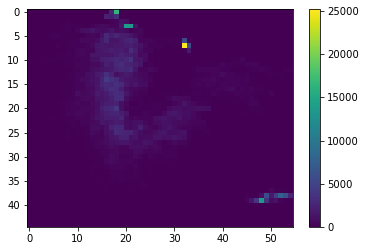

In [134]:
t = 1300
lons = particles['lon'][:,t].values
index = np.where(np.isnan(lons) == False)
lons = lons[index]
lats = particles['lat'][:,t].values
index = np.where(np.isnan(lats) == False)
lats = lats[index]

h, la, lo = np.histogram2d(lons, lats, bins=(45, 55))
np.
plt.imshow(h)
plt.colorbar()

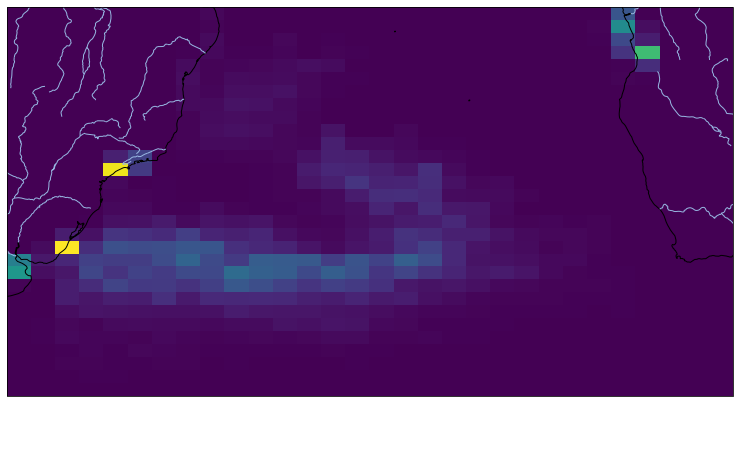

In [150]:
fig = plt.figure(figsize=(13,13))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent((-80, 25, -80, -5), crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS)

t = 1300
ax.text(10,-58,time_range[t].date(), color='white', fontsize=15)

lons = particles['lon'][:,t].values
index = np.where(np.isnan(lons) == False)
lons = lons[index]
lats = particles['lat'][:,t].values
index = np.where(np.isnan(lats) == False)
lats = lats[index]
ax.hist2d(lons, lats, bins=30);

#ax.scatter(particles['lon'][:,t], particles['lat'][:,t], color='k', s=0.01);

In [130]:
plt.hist2d(h_mask, bins=100)

TypeError: hist2d() missing 1 required positional argument: 'y'

In [77]:
t=1000
np.histogram2d(particles['lon'][:,t].values, particles['lat'][:,t].values, bins=(899, 1176))

ValueError: autodetected range of [nan, nan] is not finite

In [75]:
np.hstack((np.ones(3), 0))

array([1., 1., 1., 0.])

In [74]:
np.ones(100)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
h[0].shape

(10, 10)

In [45]:
particles['lon'][:,t].values

array([ 13.002034,  13.008966,  13.004282, ..., -46.301525, -46.295113,
       -46.278774], dtype=float32)